In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [4]:
df['label'].nunique()

22

In [5]:
rice=df[df['label']=='rice']
rice.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [6]:
coconut=df[df['label']=='coconut']
coconut.head()

N   P   K  temperature   humidity        ph    rainfall    label
1800  18  30  29    26.762749  92.860569  6.420019  224.590366  coconut
1801  37  23  28    25.612944  94.313884  5.740055  224.320676  coconut
1802  13  28  33    28.130115  95.648076  5.686973  151.076190  coconut
1803   2  21  35    25.028872  91.537209  6.293662  179.824894  coconut
1804  10  18  35    27.797977  99.645730  6.381975  181.694228  coconut

In [7]:
rice['N'].mean()

79.89

In [8]:
coconut['N'].mean()

21.98

In [9]:
rice['temperature'].mean()

23.6893322105

In [10]:
coconut['temperature'].mean()

27.409892172299998

In [11]:
grouped=df.groupby('label')

In [12]:
grouped[['temperature']].mean()

temperature
label                   
apple          22.630942
banana         27.376798
blackgram      29.973340
chickpea       18.872847
coconut        27.409892
coffee         25.540477
cotton         23.988958
grapes         23.849575
jute           24.958376
kidneybeans    20.115085
lentil         24.509052
maize          22.389204
mango          31.208770
mothbeans      28.194920
mungbean       28.525775
muskmelon      28.663066
orange         22.765725
papaya         33.723859
pigeonpeas     27.741762
pomegranate    21.837842
rice           23.689332
watermelon     25.591767

In [13]:
grouped[['N']].mean()

N
label              
apple         20.80
banana       100.23
blackgram     40.02
chickpea      40.09
coconut       21.98
coffee       101.20
cotton       117.77
grapes        23.18
jute          78.40
kidneybeans   20.75
lentil        18.77
maize         77.76
mango         20.07
mothbeans     21.44
mungbean      20.99
muskmelon    100.32
orange        19.58
papaya        49.88
pigeonpeas    20.73
pomegranate   18.87
rice          79.89
watermelon    99.42

In [14]:
group=grouped['temperature'].agg(min="min",max="max",mean="mean").reset_index()

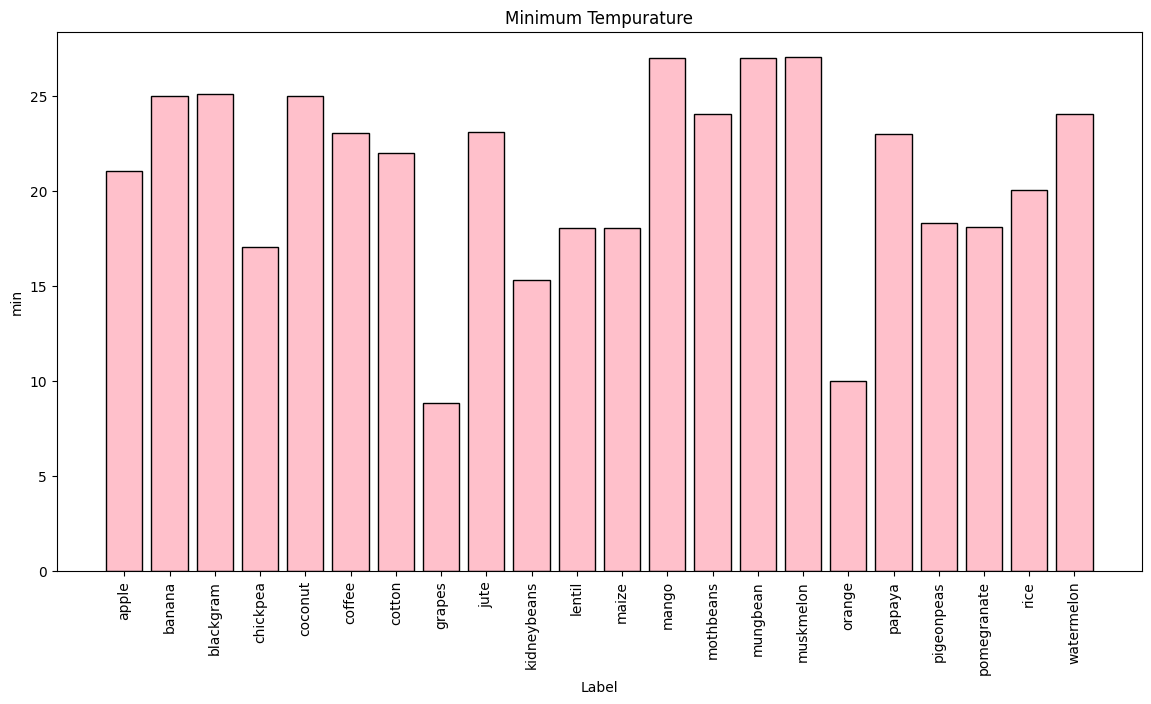

In [15]:
x=list(group['label'])
y=list(group['min'])
plt.figure(figsize=(14,7))
plt.bar(x,y,ec='k',color='pink')
plt.title('Minimum Tempurature')
plt.xlabel('Label')
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()


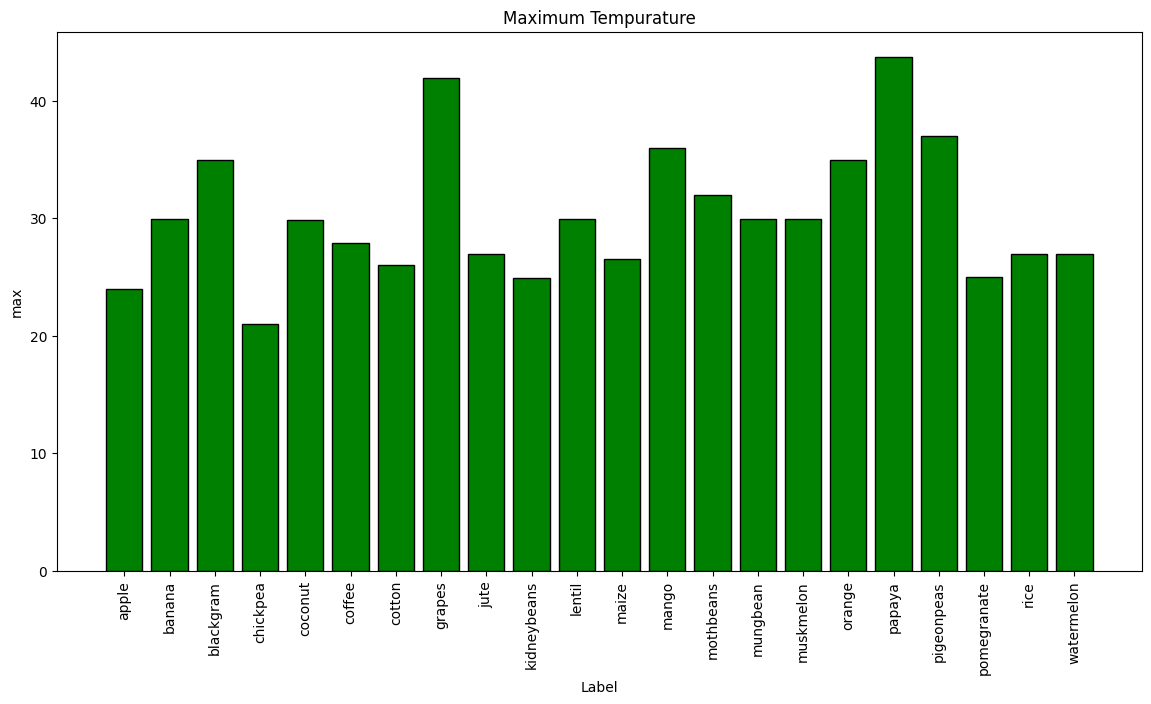

In [16]:
x=list(group['label'])
y=list(group['max'])
plt.figure(figsize=(14,7))
plt.bar(x,y,ec='k',color='green')
plt.title('Maximum Tempurature')
plt.xlabel('Label')
plt.ylabel('max')
plt.xticks(rotation=90)
plt.show()


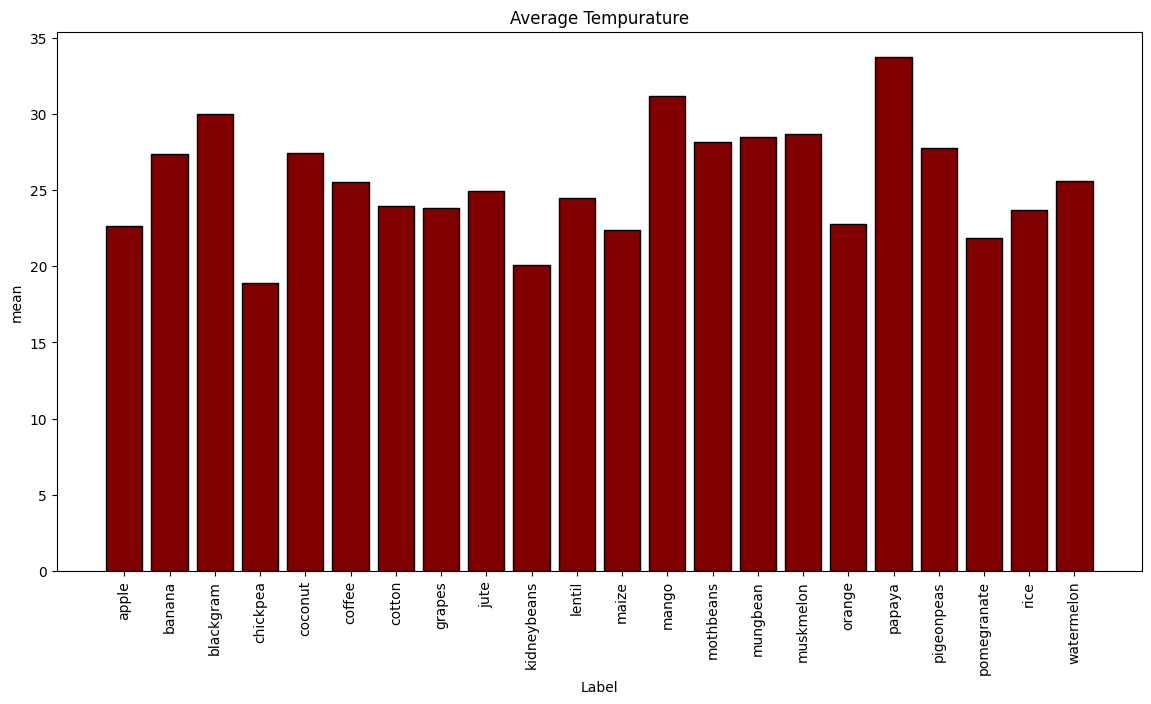

In [17]:
x=list(group['label'])
y=list(group['mean'])
plt.figure(figsize=(14,7))
plt.bar(x,y,ec='k',color='maroon')
plt.title('Average Tempurature')
plt.xlabel('Label')
plt.ylabel('mean')
plt.xticks(rotation=90)
plt.show()


In [18]:
x=df.drop('label',axis='columns')
x.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

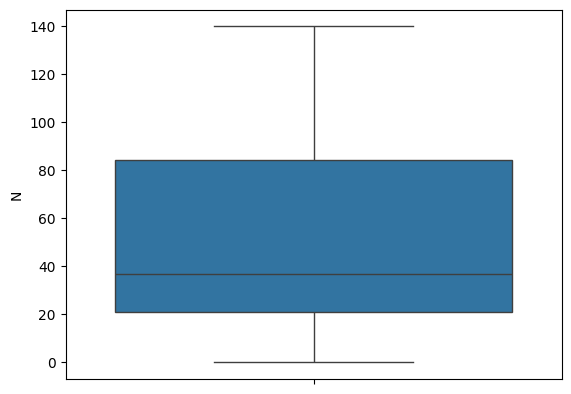

In [19]:
sns.boxplot(df['N'])
plt.show()

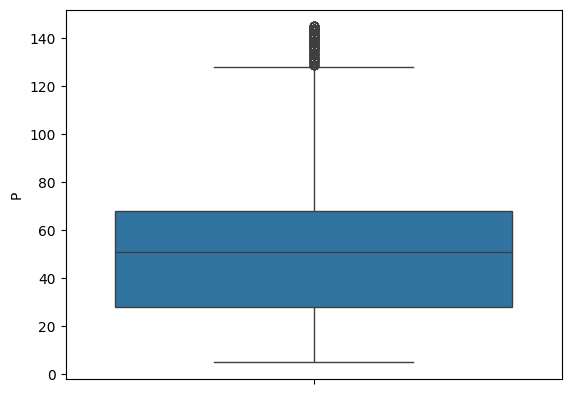

In [20]:
sns.boxplot(df['P'])
plt.show()

In [21]:
#Domain Knowledge


Normalize

In [22]:
import warnings
warnings.filterwarnings('ignore')

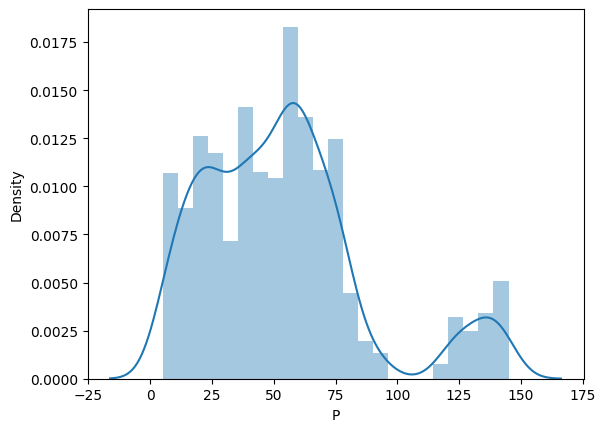

In [23]:
sns.distplot(df['P'])
plt.show()


In [24]:
## to normalize the outliers
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std=StandardScaler()
x_transformed=std.fit_transform(x)#data transformation

In [25]:
x_transformed #mean=0 median=1

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [26]:
print("Total number of clay samples:",x_transformed.shape[0])

Total number of clay samples: 2200


Training and Testing Spliting

In [27]:
train=x_transformed[:2100]# no y vairiable so no train_test_split
test=x_transformed[2100:]

In [28]:
# unsupervised k-means(on basis of similarity)
from sklearn.cluster import KMeans
obj=KMeans() #n_clusters by default 8

In [29]:
#algorithms fitted on training data
obj.fit(train)

KMeans()

In [30]:
clust=obj.labels_ #numbers between 0 and 7 i.e 8 groups

In [31]:
pd.DataFrame(train)

0         1         2         3         4         5         6
0     1.068797 -0.344551 -0.101688 -0.935587  0.472666  0.043302  1.810361
1     0.933329  0.140616 -0.141185 -0.759646  0.397051  0.734873  2.242058
2     0.255986  0.049647 -0.081939 -0.515898  0.486954  1.771510  2.921066
3     0.635298 -0.556811 -0.160933  0.172807  0.389805  0.660308  2.537048
4     0.743673 -0.344551 -0.121436 -1.083647  0.454792  1.497868  2.898373
...        ...       ...       ...       ...       ...       ...       ...
2095  0.987516 -0.283905 -0.101688 -0.343973  0.687857  0.322121  1.347709
2096  1.014610 -0.041322 -0.180682 -0.333300  0.745295  0.530815  0.931775
2097  1.068797 -0.435519 -0.220179 -0.158383  0.458476  0.506085  1.589290
2098  1.068797 -0.435519 -0.101688 -0.230870  0.485414  0.387542  1.592564
2099  0.906235 -0.465842 -0.101688  0.189226  0.105045  1.023701  1.016612

[2100 rows x 7 columns]

In [32]:
testing_df=x[:2100]

In [33]:
testing_df['cluster']=clust

In [34]:
testing_df

N   P   K  temperature   humidity        ph    rainfall  cluster
0     90  42  43    20.879744  82.002744  6.502985  202.935536        4
1     85  58  41    21.770462  80.319644  7.038096  226.655537        4
2     60  55  44    23.004459  82.320763  7.840207  263.964248        4
3     74  35  40    26.491096  80.158363  6.980401  242.864034        4
4     78  42  42    20.130175  81.604873  7.628473  262.717340        4
...   ..  ..  ..          ...        ...       ...         ...      ...
2095  87  44  43    23.874845  86.792613  6.718725  177.514731        4
2096  88  52  39    23.928879  88.071123  6.880205  154.660874        4
2097  90  39  37    24.814412  81.686889  6.861069  190.788639        4
2098  90  39  43    24.447439  82.286484  6.769346  190.968489        4
2099  84  38  43    26.574217  73.819949  7.261581  159.322307        4

[2100 rows x 8 columns]

In [35]:
testing_df['Label']=df[:2100]['label']

In [36]:
testing_df

N   P   K  temperature   humidity        ph    rainfall  cluster Label
0     90  42  43    20.879744  82.002744  6.502985  202.935536        4  rice
1     85  58  41    21.770462  80.319644  7.038096  226.655537        4  rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248        4  rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034        4  rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340        4  rice
...   ..  ..  ..          ...        ...       ...         ...      ...   ...
2095  87  44  43    23.874845  86.792613  6.718725  177.514731        4  jute
2096  88  52  39    23.928879  88.071123  6.880205  154.660874        4  jute
2097  90  39  37    24.814412  81.686889  6.861069  190.788639        4  jute
2098  90  39  43    24.447439  82.286484  6.769346  190.968489        4  jute
2099  84  38  43    26.574217  73.819949  7.261581  159.322307        4  jute

[2100 rows x 9 columns]

In [37]:
testing_df['cluster'].value_counts()

cluster
1    427
7    276
4    267
0    264
6    249
5    219
2    200
3    198
Name: count, dtype: int64

In [38]:
testing_df['cluster'].nunique()

8

In [39]:
fifth_cluster=testing_df[testing_df['cluster']==5]

In [40]:
print('Total point in the fifth group:',fifth_cluster.shape[0])#as shape returns a tuple with no of rows and columns

Total point in the fifth group: 219


In [41]:
list(fifth_cluster['Label'].unique()) #kmeans uses euclidean formula

['chickpea', 'kidneybeans', 'pigeonpeas', 'lentil']

In [42]:
obj.score(train,clust)

-4586.586691133432

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
silhouette_score(train,clust)*100 #-1 to +1 so the score is good because previously the score was form 0 to 1

33.1821251885824

Saving objects

In [45]:
import os,joblib

In [46]:
os.makedirs('models',exist_ok=True)

In [47]:
joblib.dump(obj,'./models/kmeans_model')

['./models/kmeans_model']

In [48]:
app_data=testing_df[['cluster','Label']]
app_data.head()

cluster Label
0        4  rice
1        4  rice
2        4  rice
3        4  rice
4        4  rice

In [49]:
app_data.to_csv('./models/app_data.csv',index=False)

In [50]:
joblib.dump(std,'./models/standard_scalar')

['./models/standard_scalar']

In [51]:
## saved
#KMeans algorithms
#dataframe
#standard scalar

In [52]:
df=pd.read_csv(r'C:\Users\DeLL\Desktop\Data_Science\Farmer\models\app_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DeLL\\Desktop\\Data_Science\\Farmer\\models\\app_data.csv'